In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


In [3]:
df = pd.read_csv("data.csv")
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


In [5]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [13]:
y_pred = model.predict(X_test_scaled)


In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[70  1]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
y_probs = model.predict_proba(X_test_scaled)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_probs))


ROC-AUC Score: 0.99737962659679


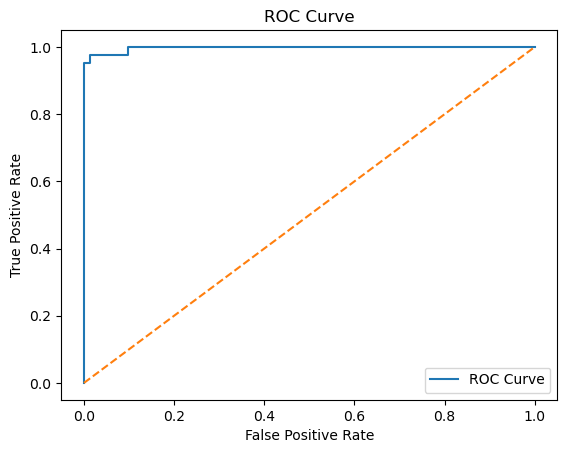

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()


In [21]:
custom_threshold = 0.4
y_custom = (y_probs >= custom_threshold).astype(int)
print(confusion_matrix(y_test, y_custom))


[[70  1]
 [ 1 42]]
